### Logistic Regression imports and NN

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import pickle

import matplotlib.pyplot as plt

In [ ]:
# Hyper Parameters
input_size = 784
num_epochs = 50
batch_size = 100
output_size = 10

transform = transforms.Compose(
         [transforms.ToTensor(),
         transforms.Normalize((0.1307,), (0.3015,))])

In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

### Utility Functions

In [ ]:
#function for grapsh
def create_graphs(train_acc, train_loss):
  epochs_lst =list(range(1,num_epochs+1))
  plt.plot(epochs_lst , train_acc,  label= "train", color= 'purple')
  plt.title("Accuracy Value per Epochs")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  plt.plot(epochs_lst,train_loss , label= "train")
  plt.title("Loss Value per Epochs")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

In [ ]:
#function for Train

def train(nn1, train_loader, train_dataset, num):
    train_count =[]
    train_loss=[]
    train_acc =[]
    train_total =0
    train_correct = 0
    train_loss_tot = 0

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            labels = labels.to(device)
            images = images.to(device)

            if num!=3 and num!=4:
              images = images.view(-1, 28*28).requires_grad_()

            #forward step
            optimizer.zero_grad()
            outputs = nn1(images)
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            train_count.append(train_total)

            #loss
            loss = criterion(outputs, labels)
            train_loss_tot+= loss.detach().numpy()

            #backward
            loss.backward()
            optimizer.step()

            if (i+1) % 200==0:
              print('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))

        train_loss.append(train_loss_tot/train_total)
        train_acc.append(train_correct/train_total)

    create_graphs(train_acc, train_loss)

### i)Logistic Regression

In [ ]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transform,
                            download=True)

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = LogisticRegressionModel(input_size , output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(model, train_loader, train_dataset,1)

with open("train_hw1_206238891_logisticR.pkl", "wb") as f:
     pickle.dump(model, f)


### ii)Logistic Regression With Regularization

In [ ]:
# MNIST Dataset (Images and Labels)
train_dataset2 = dsets.MNIST(root='./data',
                            train=True,
                            transform=transform,
                            download=True)

test_dataset2 = dsets.MNIST(root='./data',
                           train=False,
                           transform=transform)

# Dataset Loader (Input Pipline)
train_loader2 = torch.utils.data.DataLoader(dataset=train_dataset2,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader2 = torch.utils.data.DataLoader(dataset=test_dataset2,
                                          batch_size=batch_size,
                                          shuffle=False)

Epoch [1/50], Iter [200/600] Loss: 1.1468
Epoch [1/50], Iter [400/600] Loss: 0.9321
Epoch [1/50], Iter [600/600] Loss: 0.6392
Epoch [2/50], Iter [200/600] Loss: 0.6681
Epoch [2/50], Iter [400/600] Loss: 0.6654
Epoch [2/50], Iter [600/600] Loss: 0.5142
Epoch [3/50], Iter [200/600] Loss: 0.5931
Epoch [3/50], Iter [400/600] Loss: 0.5389
Epoch [3/50], Iter [600/600] Loss: 0.4308
Epoch [4/50], Iter [200/600] Loss: 0.5291
Epoch [4/50], Iter [400/600] Loss: 0.5129
Epoch [4/50], Iter [600/600] Loss: 0.5211
Epoch [5/50], Iter [200/600] Loss: 0.5389
Epoch [5/50], Iter [400/600] Loss: 0.3360
Epoch [5/50], Iter [600/600] Loss: 0.2746
Epoch [6/50], Iter [200/600] Loss: 0.4130
Epoch [6/50], Iter [400/600] Loss: 0.3997
Epoch [6/50], Iter [600/600] Loss: 0.5649
Epoch [7/50], Iter [200/600] Loss: 0.3778
Epoch [7/50], Iter [400/600] Loss: 0.3855
Epoch [7/50], Iter [600/600] Loss: 0.3971
Epoch [8/50], Iter [200/600] Loss: 0.4240
Epoch [8/50], Iter [400/600] Loss: 0.3565
Epoch [8/50], Iter [600/600] Loss:

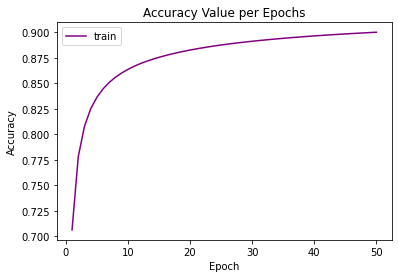

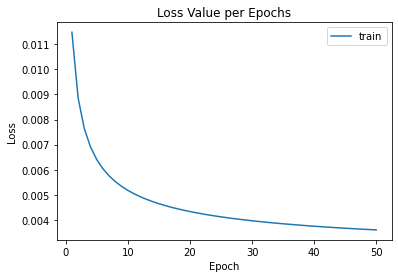

In [ ]:
model2 = LogisticRegressionModel(input_size , output_size)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=1e-3, weight_decay=1e-5)


train(model2, train_loader2, train_dataset2, 2)

with open("train_hw1_206238891_logisticR_reg.pkl", "wb") as f:
     pickle.dump(model2, f)

### Bayesian Imports

In [ ]:
!pip install blitz-bayesian-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 4.2 MB/s 


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np

from blitz.modules import BayesianLinear, BayesianConv2d
from blitz.losses import kl_divergence_from_nn
from blitz.utils import variational_estimator

import matplotlib.pyplot as plt
import pickle

In [ ]:
# Hyper Parameters
input_size = 784
num_epochs = 50
batch_size = 100

transform = transforms.Compose(
         [transforms.ToTensor(),
         transforms.Normalize((0.1307,), (0.3015,))])

### iii)Bayesian1

In [ ]:
class Bayesian_Neural_Network1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = BayesianConv2d(1, 6, (5,5))
        self.conv2 = BayesianConv2d(6, 10, (5,5))
        self.linear1   = BayesianLinear(160, 110)
        self.linear2   = BayesianLinear(110, 84)
        self.linear3   = BayesianLinear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.linear1(out))
        out = F.relu(self.linear2(out))
        out = self.linear3(out)
        return out

In [ ]:
# MNIST Dataset (Images and Labels)
train_datasetb1 = dsets.MNIST(root='./data',
                            train=True,
                            transform=transform,
                            download=True)


# Dataset Loader (Input Pipline)
train_loaderb1 = torch.utils.data.DataLoader(dataset=train_datasetb1,
                                           batch_size=batch_size,
                                           shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nb1 = Bayesian_Neural_Network1().to(device)
optimizer = optim.Adam(nb1.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

train(nb1, train_loaderb1, train_datasetb1, 3)

with open("train_hw1_206238891_b1.pkl", "wb") as f:
     pickle.dump(nb1, f)


### iv) Bayesian 2

In [ ]:
class Bayesian_Neural_Network2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = BayesianConv2d(1, 6, (5,5))
        self.conv2 = BayesianConv2d(6, 10, (5,5))
        self.linear1   = BayesianLinear(160, 110)
        self.linear2  = BayesianLinear(110, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.linear1(out))
        out = self.linear2(out)
        return out

In [ ]:
# MNIST Dataset (Images and Labels)
train_datasetb2 = dsets.MNIST(root='./data',
                            train=True,
                            transform=transform,
                            download=True)


# Dataset Loader (Input Pipline)
train_loaderb2 = torch.utils.data.DataLoader(dataset=train_datasetb2,
                                           batch_size=batch_size,
                                           shuffle=True)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nb2 = Bayesian_Neural_Network2().to(device)
optimizer = optim.Adam(nb2.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

train(nb2, train_loaderb2, train_datasetb2, 4)

with open("train_hw1_206238891_b2.pkl", "wb") as f:
     pickle.dump(nb2, f)


### v) Bayesian 3

In [ ]:
class Bayesian_Neural_Network3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1   = BayesianLinear(input_size, 512)
        self.fc2   = BayesianLinear(512, 10)

    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
# MNIST Dataset (Images and Labels)
train_datasetb3 = dsets.MNIST(root='./data',
                            train=True,
                            transform=transform,
                            download=True)


# Dataset Loader (Input Pipline)
train_loaderb3 = torch.utils.data.DataLoader(dataset=train_datasetb3,
                                           batch_size=batch_size,
                                           shuffle=True)


Using downloaded and verified file: ./data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nb3 = Bayesian_Neural_Network3().to(device)
optimizer = optim.Adam(nb3.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

train(nb3, train_loaderb3, train_datasetb3, 5)

with open("train_hw1_206238891_b3.pkl", "wb") as f:
     pickle.dump(nb3, f)
